Datasets links :

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from matplotlib.colors import ListedColormap

# 1) Load the HeartDiseaseUCI dataset and display it. Pay attention to the first column

In [2]:
import pandas as pd
from sklearn import datasets
df = pd.read_csv("processed.cleveland.data.csv")


# 2) Display the shape and description of the dataset

In [12]:

df.columns = ['age','sex','cp','testbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']

df.describe()


,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [13]:
df.shape

(302, 14)

# 3) Delete the values to Nan and check the shape

In [14]:
df2=df.dropna(axis=0)
df2.shape

(302, 14)

# 4) Display the number of classes in this dataset

In [15]:
df.dtypes.value_counts()


float64    11
object      2
int64       1
dtype: int64

In [16]:
df.count()

age        302
sex        302
cp         302
testbps    302
chol       302
fbs        302
restecg    302
thalach    302
exang      302
oldpeak    302
slope      302
ca         302
thal       302
num        302
dtype: int64

# 5) Display the scatter plot matrix and the correlation matrix

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='cp', ylabel='age'>,
        <AxesSubplot:xlabel='testbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='fbs', ylabel='age'>,
        <AxesSubplot:xlabel='restecg', ylabel='age'>,
        <AxesSubplot:xlabel='thalach', ylabel='age'>,
        <AxesSubplot:xlabel='exang', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>,
        <AxesSubplot:xlabel='slope', ylabel='age'>,
        <AxesSubplot:xlabel='num', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='sex'>,
        <AxesSubplot:xlabel='sex', ylabel='sex'>,
        <AxesSubplot:xlabel='cp', ylabel='sex'>,
        <AxesSubplot:xlabel='testbps', ylabel='sex'>,
        <AxesSubplot:xlabel='chol', ylabel='sex'>,
        <AxesSubplot:xlabel='fbs', ylabel='sex'>,
        <AxesSubplot:xlabel='restecg', ylabel='sex'>,
        <AxesSubplot:

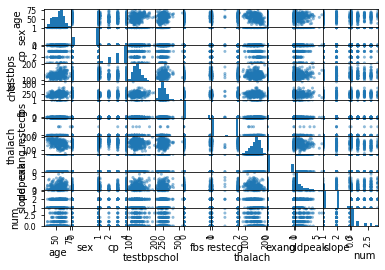

In [17]:
pd.plotting.scatter_matrix(df)

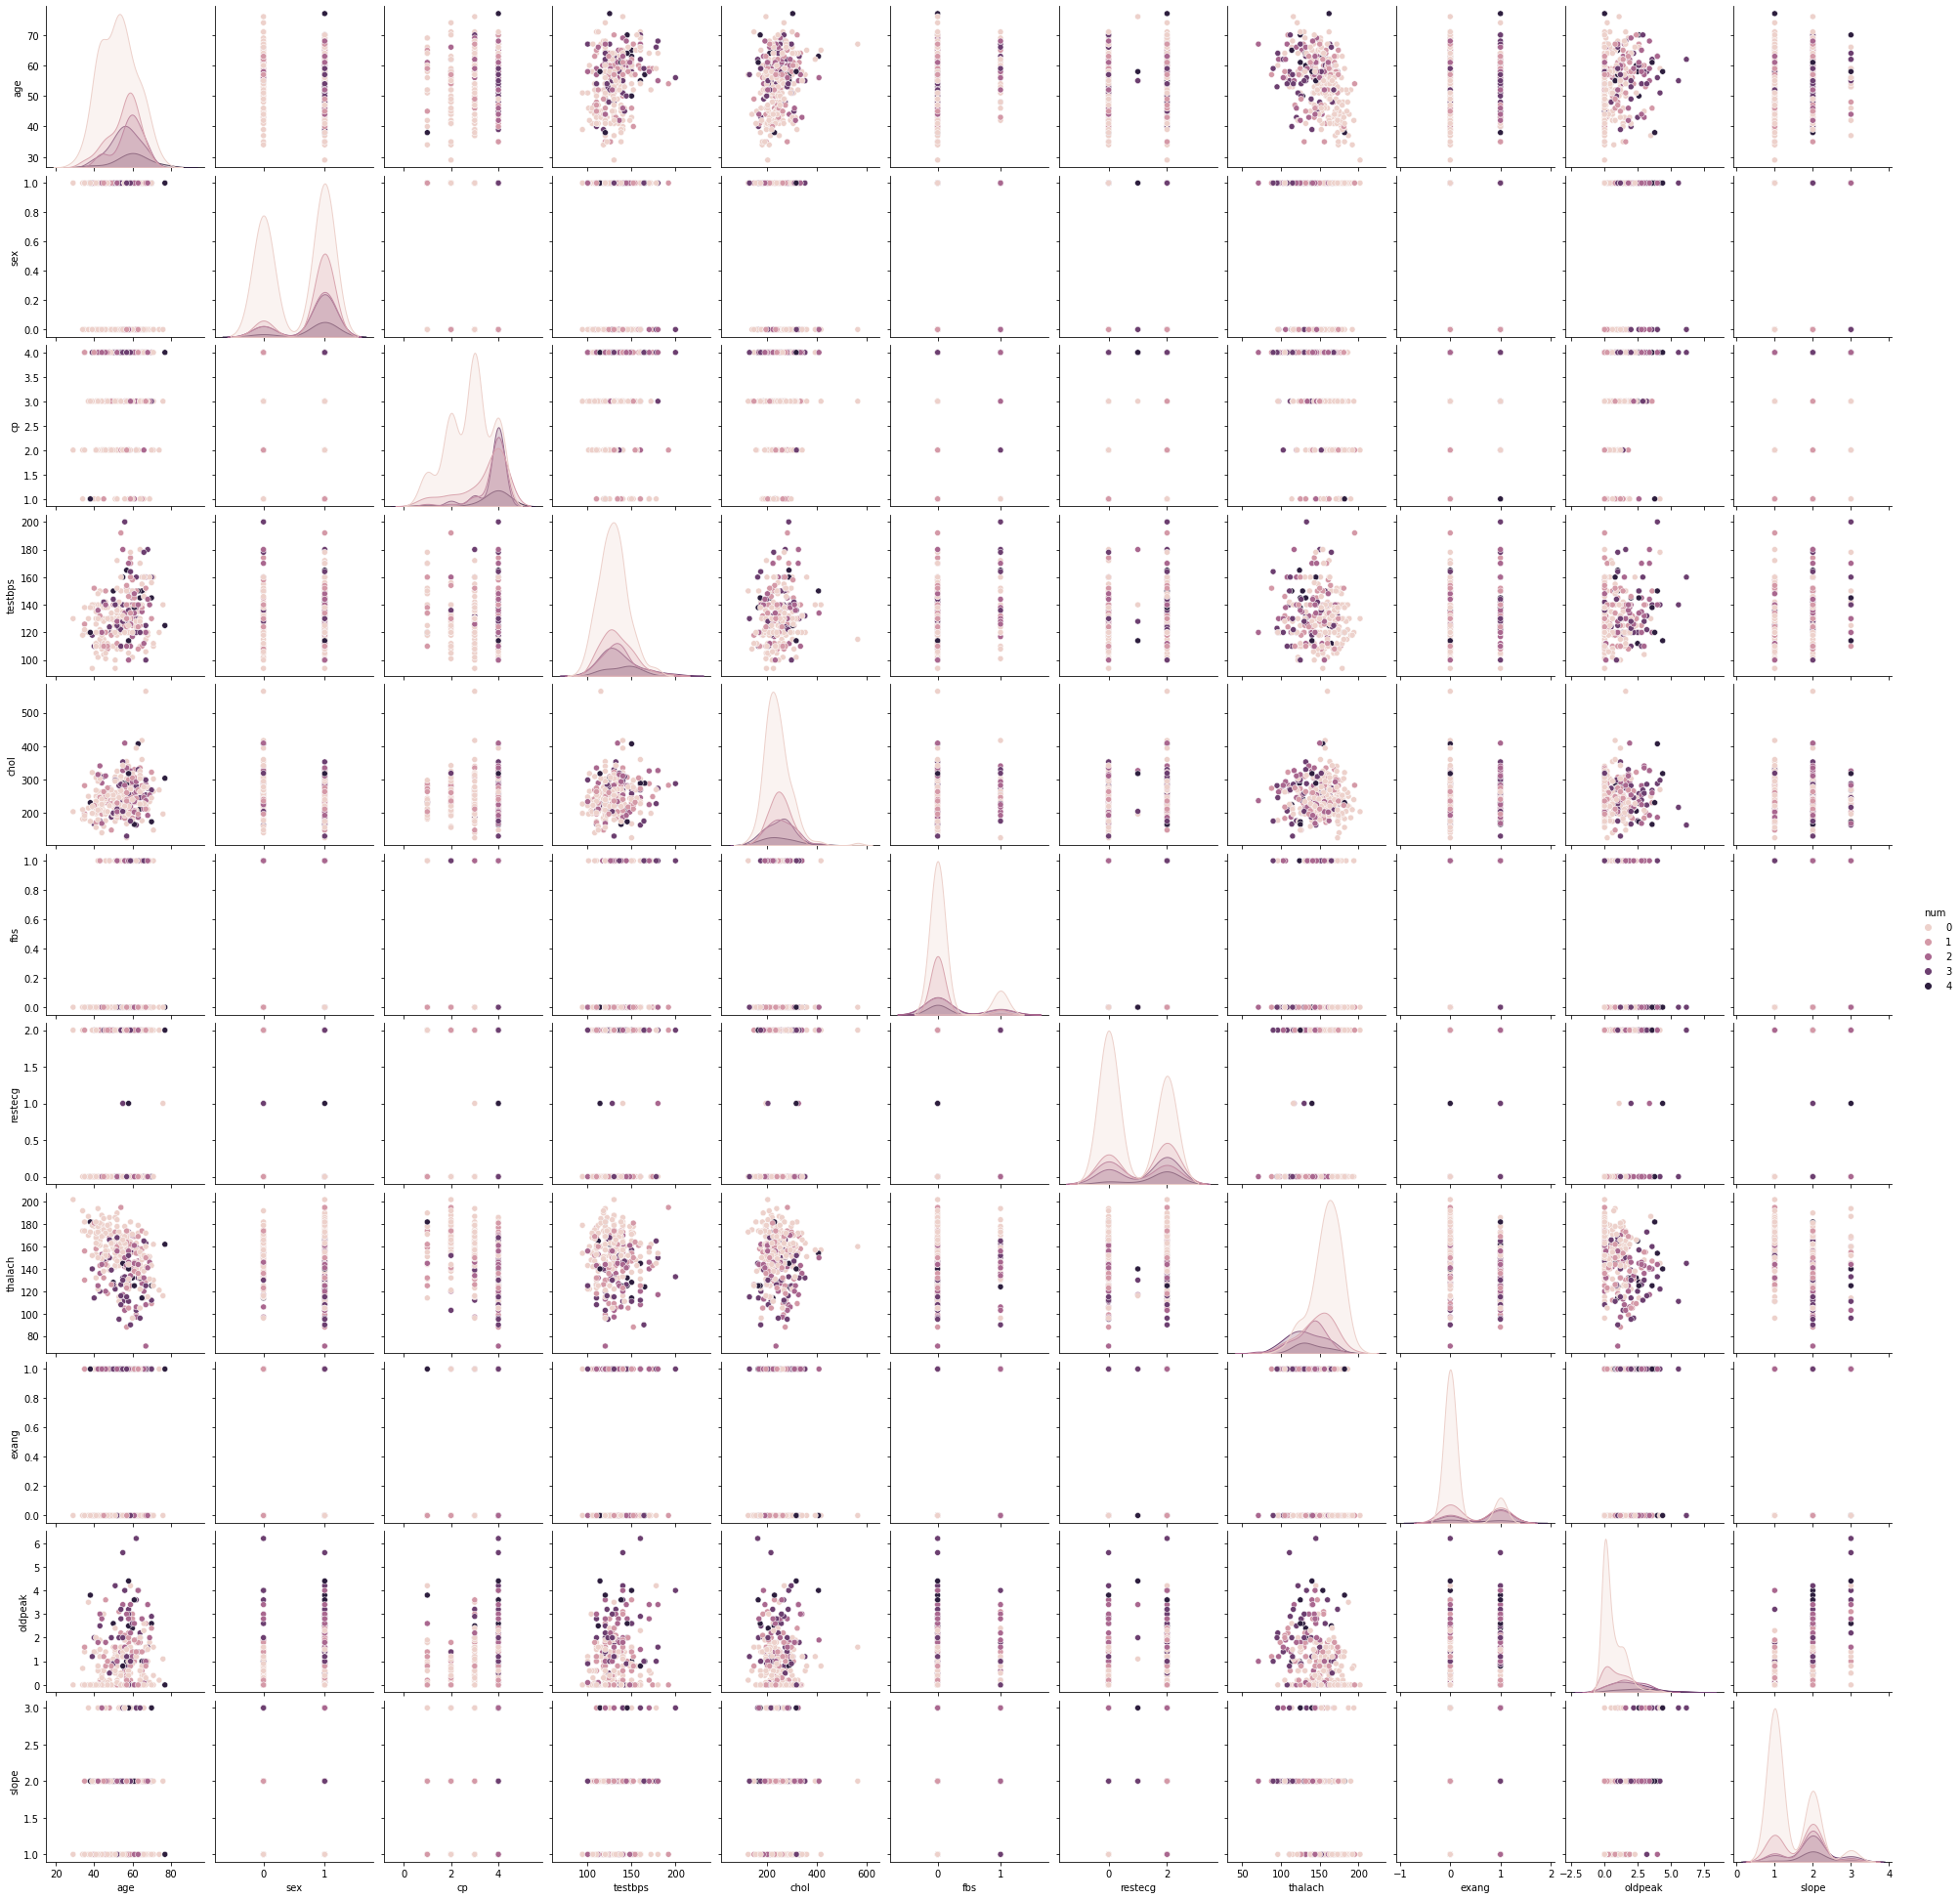

In [18]:
import seaborn as sns
sns.pairplot(df, hue="num")

In [19]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.000000,-0.099925,0.112326,0.283257,0.210120,0.112245,0.146142,-0.394448,0.094065,0.201083,0.156199,0.225809
sex,-0.099925,1.000000,0.015342,-0.066292,-0.199492,0.042863,0.019386,-0.048740,0.148019,0.099976,0.032671,0.226601
cp,0.112326,0.015342,1.000000,-0.030717,0.070950,-0.022524,0.075854,-0.337136,0.382394,0.212589,0.171926,0.405182
testbps,0.283257,-0.066292,-0.030717,1.000000,0.130924,0.171127,0.144395,-0.045437,0.066627,0.186987,0.112752,0.159978
chol,0.210120,-0.199492,0.070950,0.130924,1.000000,0.012058,0.172249,-0.003417,0.060755,0.047617,-0.002085,0.070315
fbs,0.112245,0.042863,-0.022524,0.171127,0.012058,1.000000,0.062202,-0.008067,0.031514,-0.002907,0.042630,0.065937
restecg,0.146142,0.019386,0.075854,0.144395,0.172249,0.062202,1.000000,-0.083591,0.087432,0.110879,0.127603,0.186769
thalach,-0.394448,-0.048740,-0.337136,-0.045437,-0.003417,-0.008067,-0.083591,1.000000,-0.378368,-0.343821,-0.389078,-0.415399
exang,0.094065,0.148019,0.382394,0.066627,0.060755,0.031514,0.087432,-0.378368,1.000000,0.291536,0.265491,0.395996
oldpeak,0.201083,0.099976,0.212589,0.186987,0.047617,-0.002907,0.110879,-0.343821,0.291536,1.000000,0.575415,0.508330


# 6) Create the variables X and y. Using a Sklearn MinMaxScaler, reduce the values between 0 and 1 of X. Display the mean and variance of X.

In [32]:
from sklearn.preprocessing import MinMaxScaler
print(df)
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[[0.22222222 0.625      0.06779661 0.041

# 7) Split the dataset into trains and tests, train an SKlearn Perceptron, display the classification_report

In [24]:

from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
Perceptron()
clf.score(X, y)

0.9393433500278241

In [25]:
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
wine = datasets.load_wine()
X = wine.data
y = wine.target
class_names = wine.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
classifier_tree = DecisionTreeClassifier()

y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict, target_names=class_names))

              precision    recall  f1-score   support

     class_0       0.95      1.00      0.98        20
     class_1       0.85      0.94      0.89        18
     class_2       1.00      0.81      0.90        16

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54



# 8) Display the type of variables in the dataset. Transform the relevant variables into categorical variables

In [52]:
df1= pd.Categorical(df)
df1.dtypes

AttributeError: 'Categorical' object has no attribute 'dtypes'

# 9) Transforming qualitative variables into quantitative variables

In [59]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder(categories='auto')

enc.fit(X)

print( enc.transform(X) )


[[118.  43.  44. ...  49. 120.  94.]
 [ 65.  49.  18. ...  50. 102.  92.]
 [ 63.  71.  63. ...  48.  86. 101.]
 ...
 [ 68. 119.  29. ...   6.  10.  74.]
 [ 64.  81.  38. ...   7.  14.  75.]
 [112. 117.  69. ...   8.  13.  40.]]


# 10) Define X and y again from this new dataframe, redo a MinMaxScaler, split into train and test, train a Perceptron, what is the difference in result?

In [60]:
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
wine = datasets.load_wine()
X = wine.data
y = wine.target
class_names = wine.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
classifier_tree = DecisionTreeClassifier()

y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict, target_names=class_names))

              precision    recall  f1-score   support

     class_0       1.00      0.87      0.93        15
     class_1       0.78      1.00      0.88        18
     class_2       1.00      0.86      0.92        21

    accuracy                           0.91        54
   macro avg       0.93      0.91      0.91        54
weighted avg       0.93      0.91      0.91        54



# 11) Repeat 9) with the same number of examples per class (see SKlearn's resample)

In [58]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder(categories='auto')

enc.fit(X)

print( enc.transform(X) )


[[118.  43.  44. ...  49. 120.  94.]
 [ 65.  49.  18. ...  50. 102.  92.]
 [ 63.  71.  63. ...  48.  86. 101.]
 ...
 [ 68. 119.  29. ...   6.  10.  74.]
 [ 64.  81.  38. ...   7.  14.  75.]
 [112. 117.  69. ...   8.  13.  40.]]


0.6576576576576577
0.5733333333333334


              precision    recall  f1-score   support

           0       0.75      1.00      0.86        42
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         8
           3       0.20      0.11      0.14         9
           4       0.00      0.00      0.00         3

    accuracy                           0.57        75
   macro avg       0.19      0.22      0.20        75
weighted avg       0.44      0.57      0.50        75



# Bonus) Repeat questions 7 to 11 with a Multi-Layer Perceptron

## Ex2

# 12) Import the winequality dataset, pay attention to the header. Display the dataset, the shape, the statistical information and remove the Nan values. Display the correlations

In [73]:
import pandas as pd
from sklearn import datasets
dff = pd.read_csv("WineQT.csv")
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [76]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [74]:
dff.shape

(1143, 13)

In [71]:
dff=df.dropna(axis=0)
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# 13) Perform a PCA on all variables, using the elbow rule determine the correct number of components and perform a new PCA. Display the result

In [83]:


clf.fit(X, y)

Perceptron()

In [87]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
X, y = load_digits(return_X_y=True)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# 14) Display a 2-dimensional TSNE, what do you see?

In [89]:


dff["y"] = y
dff["comp-1"] = z[:,0]
dff["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection") 

ValueError: Length of values (1797) does not match length of index (1143)

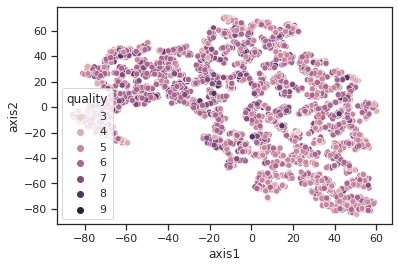

In [ ]:
len(np.unique(df.values[:,-1]))

7

In [ ]:
np.unique(df.values[:,-1])

array([3., 4., 5., 6., 7., 8., 9.])

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001000,3.00,0.45,8.80,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994000,3.30,0.49,9.50,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.995100,3.26,0.44,10.10,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.995600,3.19,0.40,9.90,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.995600,3.19,0.40,9.90,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4544,5.8,0.28,0.30,3.9,0.026,36.0,105.0,0.989630,3.26,0.58,12.75,6.0
4545,6.3,0.25,0.53,1.8,0.021,41.0,101.0,0.989315,3.19,0.31,13.00,6.0
4546,6.5,0.20,0.31,2.1,0.033,32.0,95.0,0.989435,2.96,0.61,12.00,6.0
4547,5.9,0.29,0.32,1.4,0.022,17.0,47.0,0.989900,3.35,0.35,11.50,6.0


# Classification

# 15) Prepare X and y data, split into train and test.
# 16) Define and train a MLP (neural network).
# 17) Display the loss and accuracy on the train and the validation set

2.6.0
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 150)               1650      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 707       
Total params: 17,457
Trainable params: 17,457
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
362/362 [==============================] - 3s 4ms/step - loss: 1.7334 - acc: 0.3874 - val_loss: 1.2919 - val_acc: 0.4641
Epoch 2/50
362/362 [==============================] - 1s 3ms/step - loss: 1.5302 - acc: 0.3991 - val_loss: 1.540

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

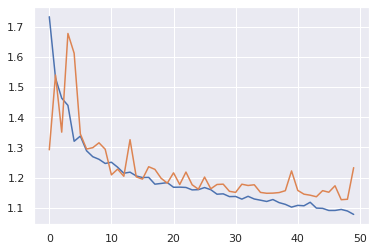

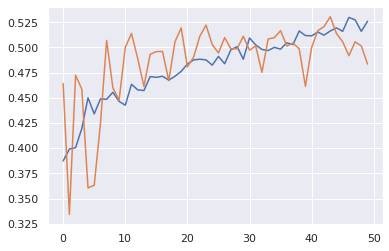

# Regression

In [ ]:
pip install tensorflow_addons

/home/benji/.conda/envs/py3.7GPU/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/benji/.conda/envs/py3.7GPU/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/home/benji/.conda/envs/py3.7GPU/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
result = tfa.metrics.RSquare(dtype=tf.float32, y_shape=(1,))

# 18)-20) Same question as above with a regression problem. Use the result function as a metric

Epoch 1/100
1447/1447 [==============================] - 6s 3ms/step - loss: 2.5778 - r_square: -2.1863 - val_loss: 0.8499 - val_r_square: -0.0524
Epoch 2/100
1447/1447 [==============================] - 4s 3ms/step - loss: 0.6777 - r_square: 0.1624 - val_loss: 0.6820 - val_r_square: 0.1555
Epoch 3/100
1447/1447 [==============================] - 4s 3ms/step - loss: 0.6178 - r_square: 0.2364 - val_loss: 0.5545 - val_r_square: 0.3134
Epoch 4/100
1447/1447 [==============================] - 4s 3ms/step - loss: 0.5910 - r_square: 0.2695 - val_loss: 0.5963 - val_r_square: 0.2616
Epoch 5/100
1447/1447 [==============================] - 4s 3ms/step - loss: 0.5497 - r_square: 0.3206 - val_loss: 0.5342 - val_r_square: 0.3386
Epoch 6/100
1447/1447 [==============================] - 4s 3ms/step - loss: 0.5507 - r_square: 0.3193 - val_loss: 0.5507 - val_r_square: 0.3181
Epoch 7/100
1447/1447 [==============================] - 4s 3ms/step - loss: 0.5296 - r_square: 0.3454 - val_loss: 0.5318 - val_

In [ ]:
print(list(zip(y_test,pred))[:5])

[(6.0, array([7.8052974], dtype=float32)), (6.0, array([5.603185], dtype=float32)), (5.0, array([5.132704], dtype=float32)), (5.0, array([5.3046055], dtype=float32)), (7.0, array([5.1558127], dtype=float32))]


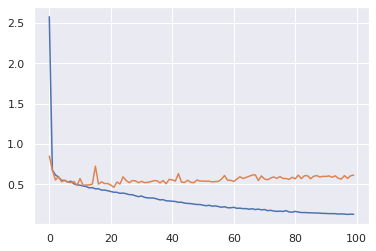

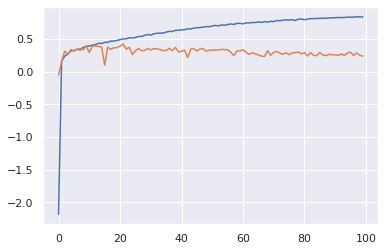

# Bonus) Competition between students, looking for the best architecture for regression and classification without overfitting... ! May the best one win !